# IFQ619 - Assignment 1
## Foundational Data Analytics Techniques

#### INSTRUCTIONS

1. Complete the section below with your personal details (and run the cell)
2. Complete the full **QDAVI** data analytics cycle for both questions. Ensure that you complete the cycle by addressing the question with your insights.
3. Ensure that you use markdown cells to document your thinking and decision making for each stage of the process. Be clear on how your decisions are working towards addressing the question.
4. Ensure that your code runs without errors, and that your results are appropriate for the question.
5. Use comments in your code to explain what you are doing

In [1]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.core.display import display, HTML

first_name = "Stephen"
last_name = "Whebell"
student_number = "n10924426"

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

---

## QUESTION 1

#### Question: 
In the tech sector, which factors are most common for team member attitudes about mental health? 

#### Data:
[OSMI Mental Health in Tech Survey 2016](https://www.kaggle.com/osmi/mental-health-in-tech-2016)

#### Minimum required techniques:
Data cleaning, Aggregation

In [2]:
# import libraries for this question here
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Question

In the specific setting of the tech sector, we are aiming to determine what attitudes exist toward mental health and what factors are associated with particular attitudes.

This question can be broken down into two essential components:
1. What are team member attitudes toward mental health?
    - These attitudes may be employer related, colleague related or more introspective.
2. What factors are associated with these attitudes?

To aid in interpretation of this data, it is also necessary to explore the demographics of those who responded to the survey as well as the prevalence of mental health conditions.<br>

Key stakeholders include:
1. Tech companies/employers seeking to guage the prevalence of  and attitudes surrounding mental health issues within their workforce as well
2. Tech companies/employers seeking to guage the efficacy of interventions to change attitude or support mental health
3. Tech workers seeking to learn more about mental health in tech and resources available



### 1.2 Data

**Importation of data and initial exploration**

Import the raw data into a dataframe and begin to explore what it looks like and what is available for analysis

In [3]:
# Import the data
mhdf = pd.read_csv('data/mhtech2016.csv')

# let pandas display all the columns

pd.set_option('display.max_columns', 70)

# Quick review of what the data looks like

mhdf.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [4]:
# Explore the shape of available data
mhdf.shape

(1433, 63)

In [5]:
mhdf.describe() # Describe numerical responses - note the min/max of age are nonsensical 

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


Make a list of what questions were asked:

In [6]:
questions = mhdf.columns.tolist()
# List outputted and reviewed in external text editor

<br>

**Remove responses from those who do not work in a tech role or at a tech company**

As the question pertains to the tech industry specifically, we should look for and then exclude any responses coming from people who are working in non-tech roles in non-tech companies.

In [7]:
# Find out how many people don't work for a tech company and make sure they are codified consistently

mhdf['Is your employer primarily a tech company/organization?'].value_counts() 

1.0    883
0.0    263
Name: Is your employer primarily a tech company/organization?, dtype: int64

In [8]:
# Find out how many people don't work in a tech role and make sure they are codified consistently

mhdf['Is your primary role within your company related to tech/IT?'].value_counts()

1.0    248
0.0     15
Name: Is your primary role within your company related to tech/IT?, dtype: int64

In [9]:
# Find the indexes of people who work in neither a tech company or a tech role and then remove them from the DF

nontechindex = mhdf[(mhdf['Is your employer primarily a tech company/organization?'] == 0.0) &
    (mhdf['Is your primary role within your company related to tech/IT?'] == 0.0)].index

mhdf.drop(index=nontechindex, inplace=True)

In [10]:
# Reset the index now that we have dropped some rows

mhdf.reset_index(inplace=True, drop=True)

<br>

**Remove columns that have predominantly missing data or will not be used in analysis**<br><br>
Next, we need to find questions that have a significant amount of responses missing. <br>
For ease of use and interpretability this is done with a for loop to calculate percentage missing (rather than summing the null values alone). <br>
A list of columns with more than 50% missing values is also created for consideration of removal from the overall DF <br><br>

In [11]:
# Display the number of missing responses for each question as an absolute and a percentage
# Add questions that have >50% missing responses to a list

mostmissing = []

for column in mhdf.columns:
    null = mhdf[column].isnull().sum()
    percent = np.round((null / len(mhdf) * 100), decimals=1)
    print(str(column) + '\n' + str(null) + " of " + str(len(mhdf)) + " missing. " + str(percent) + "%")
    if percent >= 50:
        mostmissing.append(column)

print("\n \n These columns have >50% missing values: \n")

mostmissing

Are you self-employed?
0 of 1418 missing. 0.0%
How many employees does your company or organization have?
287 of 1418 missing. 20.2%
Is your employer primarily a tech company/organization?
287 of 1418 missing. 20.2%
Is your primary role within your company related to tech/IT?
1170 of 1418 missing. 82.5%
Does your employer provide mental health benefits as part of healthcare coverage?
287 of 1418 missing. 20.2%
Do you know the options for mental health care available under your employer-provided coverage?
420 of 1418 missing. 29.6%
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
287 of 1418 missing. 20.2%
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
287 of 1418 missing. 20.2%
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
287 of 1418 missing. 20

['Is your primary role within your company related to tech/IT?',
 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
 'Do you know local or online resources to seek help for a mental health disorder?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
 'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
 'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
 'Do you believe your productivity is ever affected by a mental health issue?',
 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
 'Ha

<br>
Drop any columns that have mostly missing data or will not be useful in analysis:<br>

- Drop US state based location data as this level of granularity will not be used in analysis
- Drop free text responses as they are not easily suited to structured data analysis
- Drop columns that have >50% missing responses
    - This includes cascading responses, as this level of granulatiry will not be used in analysis (e.g. specific mental health diagnoses)

However, there are some responses that may still be useful despite being mostly missing
- Observation of how mental health is treated in others is an important question, and should be kept despite a large amount of missing responses


In [12]:
todrop = mostmissing[:-4] + mostmissing[-3:] # Keep the question regarding observations of how an individual was treated 

<br>
Many of the questions also deal with previous employers - at this stage we are only interested in current employers for analysis. Columns pertaining to previous employers will be dropped. <br>
In the future, including previous employers would be useful in assessing change over time or more granular analysis of factors associated with certain attitudes. <br>
<br>

In [13]:
todrop.extend(['What US state or territory do you work in?',
             'What US state or territory do you live in?',
             'What country do you work in?', # What country do you live in remains - should be enough for analysis
             'Why or why not?.1', 
             'Why or why not?', # Both the 'why or why not' responses contain free text responses not easily ammenable to structured analysis
             'Do you have previous employers?', # Add questiosn relating to previous employers to the drop list
             'Have your previous employers provided mental health benefits?',
             'Were you aware of the options for mental health care provided by your previous employers?',
             'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
             'Did your previous employers provide resources to learn more about mental health issues and how to seek help?',
             'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
             'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
             'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
             'Would you have been willing to discuss a mental health issue with your previous co-workers?',
             'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
             'Did you feel that your previous employers took mental health as seriously as physical health?',
             'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?']) 
todrop # list of columns to be dropped from the DF

['Is your primary role within your company related to tech/IT?',
 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
 'Do you know local or online resources to seek help for a mental health disorder?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
 'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
 'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
 'Do you believe your productivity is ever affected by a mental health issue?',
 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
 'If

In [14]:
mhdf.drop(labels=todrop, axis=1, inplace=True)

In [15]:
# Update the list of questions remaining
questions = mhdf.columns.tolist()
questions

['Are you self-employed?',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
 'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
 'Do you think that discussing a physical h

<br>**Condense the gender column**<br>
Responses to 'What is your gender?' contain free text and need to be aggregated into consistent values amenable to analysis<br><br>
The plan is to aggregate into three categories:
- Male - including those who have transitioned to male
- Female - including those who have transitioned to female
- Other - Broad category covering non-binary and genderqueer

In addition to this - any missing values need to be imputed. Given the categorical nature of this variable, they will be imputed with the most common response.
- We know that from the earlier analysis of columns containing null values - there are 3 in the gender column

In [16]:
pd.set_option('display.max_rows', 70)

mhdf['What is your gender?'].value_counts() # What responses exist and with what frequency?

Male                                                                                                                                                             606
male                                                                                                                                                             248
Female                                                                                                                                                           150
female                                                                                                                                                            92
M                                                                                                                                                                 86
m                                                                                                                                                                 78
F         

In [17]:
# Fill NaN with 'male' - the most common response

mhdf['What is your gender?'].fillna(value='male', inplace=True)

In [18]:
mhdf['What is your gender?'] = mhdf['What is your gender?'].str.lower() # make the column lower case
mhdf['What is your gender?'] = mhdf['What is your gender?'].str.replace('[^\w\s]','') # remove all punctuation
mhdf['What is your gender?'] = mhdf['What is your gender?'].str.replace('cis','') # remove cis description
mhdf['What is your gender?'] = mhdf['What is your gender?'].str.replace('\s','') # strip all white spaces

In [19]:
# Iterate through the list and replace remaining uncategorised responses with their appropriate group
# Potentially could have used pd.replace, and would have been faster with less code

for row, i in enumerate(mhdf['What is your gender?']):
    female = re.search(r'\bfemale\b | \bf\b | \bwoman\b | \bfemalewoman\b | \bgenderfemale\b | \bfm\b | \bfemaleassignedatbirth\b | \btransitionedm2f\b | \bmtf\b | ^femalepropsfor\w* | \btransgenderwoman | \bfem\b | \biidentifyasfemale\b', i, re.X)
    male = re.search(r'\bmale\b | \bm\b | \bman\b | \bdude\b | \bsexismale\b | \bmail\b | \bmaletransftm\b | \bmalr\b | ^imamanwhy\w*', i, re.X)
    if female:
        mhdf.loc[row, 'What is your gender?'] = 'female'
    elif male:
        mhdf.loc[row, 'What is your gender?'] = 'male'
    else:
        mhdf.loc[row, 'What is your gender?'] = 'other'

In [20]:
mhdf['What is your gender?'].value_counts()

male      1055
female     332
other       31
Name: What is your gender?, dtype: int64

**Impute the non-sensical ages**

In [21]:
for row, i in enumerate(mhdf['What is your age?']): # replace excessively old or young values with NaN
    if i > 90:
        mhdf.loc[row, 'What is your age?'] = np.nan
    if i < 15:
        mhdf.loc[row, 'What is your age?'] = np.nan

mhdf['What is your age?'].fillna(np.round(mhdf['What is your age?'].mean(), decimals=0), inplace=True) # Fill the NaN values with the mean of the remaining values

In [22]:
mhdf['What is your age?'].describe()

count    1418.000000
mean       34.026798
std         8.003218
min        15.000000
25%        28.000000
50%        33.000000
75%        38.000000
max        70.000000
Name: What is your age?, dtype: float64

**Consideration of imputing remaining missing variables**<br>
Given that we are not doing any complex modeling that is not robust to missing variables, the remaining missing values will be left alone. <br>
It would be possible to impute them with the most common response for each column, but this would degrade the quality of the overall analysis at this stage. <br>

**Rationalise the number of countries**<br>
Many countries only have one response, with most having less than 10<br>
To deal with this, we can condense the countries into regions<br>
If a country has <10 resondents and is the only country in it's region, it will be classified as 'other'<br>
Countries with large numbers of responses will be separate despite fitting into a geographic region (e.g. Canada and USA) <br>

In [23]:
mhdf['What country do you live in?'].value_counts()

United States of America    826
United Kingdom              180
Canada                       78
Germany                      57
Netherlands                  48
Australia                    35
Sweden                       19
France                       16
Ireland                      15
Switzerland                  10
Brazil                       10
Russia                        9
New Zealand                   9
India                         9
Finland                       7
Denmark                       7
Bulgaria                      7
Italy                         5
Belgium                       5
Spain                         4
Romania                       4
South Africa                  4
Austria                       4
Poland                        4
Czech Republic                3
Pakistan                      3
Chile                         3
Norway                        3
Israel                        2
Mexico                        2
Estonia                       2
Bosnia a

In [24]:
# Create lists of countries belonging to each region

europe = ['Germany', 'Netherlands', 'Sweden', 'France', 'Ireland', 'Switzerland', 'Russia', 'Denmark', 'Bulgaria', 'Finland', 'Belgium', 'Italy', 'Austria',
         'Romania', 'Spain', 'Poland', 'Czech Republic', 'Norway', 'Estonia', 'Lithuania', 'Bosnia and Herzegovina', 'Serbia', 'Hungary', 'Slovakia', 'Greece']
southam = ['Brazil', 'Chile', 'Mexico', 'Colombia', 'Ecuador', 'Guatemala', 'Costa Rica', 'Venezuela', 'Argentina']
oceania = ['Australia', 'New Zealand']
asia = ['India', 'Pakistan', 'Japan', 'Afghanistan', 'Taiwan', 'Vietnam', 'Brunei', 'China', 'Iran', 'Bangladesh']
africa = ['Algeria', 'South Africa']
other = ['Other', 'Israel']

In [25]:
mhdf['What country do you live in?'].replace(europe, 'Europe', inplace=True)
mhdf['What country do you live in?'].replace(southam, 'South America', inplace=True)
mhdf['What country do you live in?'].replace(oceania, 'Oceania', inplace=True)
mhdf['What country do you live in?'].replace(asia, 'Asia', inplace=True)
mhdf['What country do you live in?'].replace(africa, 'Africa', inplace=True)
mhdf['What country do you live in?'].replace(other, 'Other', inplace=True)

In [26]:
mhdf['What country do you live in?'].value_counts()

United States of America    826
Europe                      237
United Kingdom              180
Canada                       78
Oceania                      44
South America                22
Asia                         22
Africa                        5
Other                         4
Name: What country do you live in?, dtype: int64

**Make responses as consistent**<br>
Replace 1/0 with Yes/No<br>
Replace Maybe/Not sure with Maybe<br>

In [27]:
mhdf.replace([1, 1.0], 'Yes', inplace=True)
mhdf.replace([0, 0.0], 'No', inplace=True)
mhdf.replace('Maybe/Not sure', 'Maybe', inplace=True)

Remove qualifiers from yes no answers, they will not be required in analysis currently.

In [28]:
mhdf.replace(['Yes, it has', 'Yes, I think it would', 'Yes, they do', 'Yes, I think they would', 'Yes, I experienced', 'Yes, I observed'], 'Yes', inplace=True)
mhdf.replace(['Maybe', "I don't know", 'I am not sure'], 'Maybe/Unsure', inplace=True)
mhdf.replace(["No, I don't think it would", 'No, it has not', "No, I don't think they would", 'No, they do not'], 'No', inplace=True)

### 1.3 Analysis

#### Classify questions into categories

Before meaningful analysis can take place we need to classify the nature of the questions asked

**Demographics**
>What is your age?<br>
What is your gender?<br>
What country do you live in?<br>

**Employment**
>Are you self-employed?<br>
How many employees does your company or organization have?<br>
Is your employer primarily a tech company/organization?<br>
Which of the following best describes your work position?<br>
Do you work remotely?<br>

**Prevalence of mental health conditions**
>Have you had a mental health disorder in the past?<br>
Do you currently have a mental health disorder?<br>
Do you have a family history of mental illness?<br>
Have you been diagnosed with a mental health condition by a medical professional?<br>
Have you ever sought treatment for a mental health issue from a mental health professional?<br>

**Employer related attitudes regarding mental health**
>Do you feel that your employer takes mental health as seriously as physical health?<br>
Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?<br>
Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?<br>
Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?<br>

**Impact of mental health conditions on work/career**
>Do you think that discussing a mental health disorder with your employer would have negative consequences?<br>
Do you think that discussing a physical health issue with your employer would have negative consequences?<br>
Do you feel that being identified as a person with a mental health issue would hurt your career?<br>
Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?<br>
If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?<br>
If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?<br>

**Resources, healthcare and leave for mental health**
>Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?<br>
Does your employer offer resources to learn more about mental health concerns and options for seeking help?<br>
Does your employer provide mental health benefits as part of healthcare coverage?<br>
Do you know the options for mental health care available under your employer-provided coverage?<br>
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?<br>
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:<br>

**Discussing physical and mental health**
>Would you feel comfortable discussing a mental health disorder with your coworkers?<br>
Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?<br>
Would you be willing to bring up a physical health issue with a potential employer in an interview?<br>
Would you bring up a mental health issue with a potential employer in an interview?<br>
How willing would you be to share with friends and family that you have a mental illness?<br>

<br>

Lastly, we need to pick out questions from these caregories that are most representative of current attitudes to facillitate answering the original question.<br>

**Questions representative of current attitudes**
>*Questions providing insight into emplyer related attitudes toward mental health:*<br>
>Do you feel that your employer takes mental health as seriously as physical health?<br>
>Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)<br>
>Do you think that discussing a mental health disorder with your employer would have negative consequences?<br>
>Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)<br>
>
>*Questions providing insight into attitudes related to the industry as a whole:*<br>
>Do you feel that being identified as a person with a mental health issue would hurt your career?<br>
>
>*Questions providing insight into attitudes surrounding co-workers:*<br>
>Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?<br>
>Would you feel comfortable discussing a mental health disorder with your coworkers?<br>


We will now procede to analyse the responses under each of these categories, visualise those found to be important before demonstrating the insights gained.

In [29]:
# Create a new dataframe where all of the responses are counted for each column, not useful alone, but sections can be used
counted = mhdf.apply(pd.Series.value_counts)

In [30]:
# Define a function for appending percentages of total responses to each value in a DataFrame (by columns) and return a new dataframe
# This makes it easier to visualise proportion given there are unequal numbers of responses in each column

def addpercent(df):
    df_withpercent = df.copy()
    for col in df_withpercent.columns:
        withpercent = []
        for index, i in enumerate(df_withpercent[col]):
            row = df_withpercent.index[index]
            if i != i:
                withpercent.append('N/A')
            else:
                percent = np.round((i / df[col].sum()) * 100, decimals=1)
                withpercent.append(str(i) + " (" + str(percent) + "%)") 
        df_withpercent[col] = withpercent
    return df_withpercent

# Define a function for returning a dataframe of only percentages (useful for visualisation later)

def topercent(df):
    df_topercent = df.copy()
    for col in df_topercent.columns:
        topercent = []
        for index, i in enumerate(df_topercent[col]):
            row = df_topercent.index[index]
            if i != i:
                topercent.append(np.nan)
            else:
                percent = np.round((i / df[col].sum()) * 100, decimals=1)
                topercent.append(percent) 
        df_topercent[col] = topercent
    return df_topercent

#### Demographics

We have already explored the demographics above during the process of data cleaning. <br>
We can see that the respondents are predominantly young, with a mean age of 34 and a standard deviation of only 8.<br>
The cohort is extremely male dominated.<br>
Most respondents come from English speaking, predominantly white countries with the greatest number originating from the USA.<br>
This data will be better explored with visualisation below.<br>

#### Employment

In [31]:
employcount = counted[['Are you self-employed?', 'Is your employer primarily a tech company/organization?', 'Do you work remotely?'
                      ]].dropna(how='all').reindex(index=['Yes', 'No', 'Always', 'Sometimes', 'Never'])
addpercent(employcount)

,Are you self-employed?,Is your employer primarily a tech company/organization?,Do you work remotely?
Yes,287.0 (20.2%),883.0 (78.1%),N/A
No,1131.0 (79.8%),248.0 (21.9%),N/A
Always,N/A,N/A,343.0 (24.2%)
Sometimes,N/A,N/A,749.0 (52.8%)
Never,N/A,N/A,326.0 (23.0%)


Most people work for a company, where the primary focus of the company is tech. Most people have some degree of remote work.

#### Prevalence of mental health conditions

In [32]:
prevcount = counted[['Have you had a mental health disorder in the past?',
                    'Do you currently have a mental health disorder?',
                    'Do you have a family history of mental illness?',
                    'Have you been diagnosed with a mental health condition by a medical professional?',
                    'Have you ever sought treatment for a mental health issue from a mental health professional?'
                    ]].dropna(how='all').reindex(index=['Yes', 'No', 'Maybe/Unsure'])
addpercent(prevcount)

,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Do you have a family history of mental illness?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?
Yes,731.0 (51.6%),569.0 (40.1%),663.0 (46.8%),710.0 (50.1%),831.0 (58.6%)
No,443.0 (31.2%),525.0 (37.0%),484.0 (34.1%),708.0 (49.9%),587.0 (41.4%)
Maybe/Unsure,244.0 (17.2%),324.0 (22.8%),271.0 (19.1%),N/A,N/A


More than half of all respondents have or may have had a mental health disorder. More than half have sought treatment from a mental health professional.

#### Employer related attitudes

In [33]:
empattcount = counted[['Do you feel that your employer takes mental health as seriously as physical health?',
                       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?',
                       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
                       'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?' 
                      ]].dropna(how='all').reindex(index=['Yes', 'No', 'Maybe/Unsure'])
addpercent(empattcount)

,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
Yes,346.0 (30.6%),93.0 (8.2%),426.0 (32.0%),245.0 (37.8%)
No,298.0 (26.3%),1038.0 (91.8%),564.0 (42.4%),231.0 (35.6%)
Maybe/Unsure,487.0 (43.1%),N/A,340.0 (25.6%),172.0 (26.5%)


There is uncertaintly regarding how seriously employers take mental health. Very few respondents have heard of or observed negative consequences for people who are open about mental health issues. However, a significant number have experienced/observed badly handled responses to mental health issues and a large proportion would be less likely to reveal their own mental health disorder.

#### Impact of MH on work and career

In [34]:
mhvsphcounted = counted[['Do you think that discussing a mental health disorder with your employer would have negative consequences?',
                         'Do you think that discussing a physical health issue with your employer would have negative consequences?',
                         ]].dropna(how='all').reindex(index=['Yes', 'No', 'Maybe/Unsure'])

careercounted = counted[['Do you feel that being identified as a person with a mental health issue would hurt your career?',
                         'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'
                        ]].dropna(how='all').reindex(index=['Yes', 'No', 'Maybe/Unsure'])

interferecounted = counted[['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
                            'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'
                            ]].dropna(how='all').reindex(index=['Often', 'Sometimes', 'Rarely', 'Never', 'Not applicable to me'])

In [35]:
addpercent(mhvsphcounted)

,Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?
Yes,213.0 (18.8%),40.0 (3.5%)
No,436.0 (38.5%),831.0 (73.5%)
Maybe/Unsure,482.0 (42.6%),260.0 (23.0%)


There are substanitally more people that think that discussing a mental health disorder is more likely to have negative consequences than discussing a physical health issue.

In [36]:
addpercent(careercounted)

,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
Yes,659.0 (46.5%),436.0 (30.7%)
No,177.0 (12.5%),396.0 (27.9%)
Maybe/Unsure,582.0 (41.0%),586.0 (41.3%)


There is significant concern that being identified as having a mental health issue could harm ones career in addition being viewed negatively by colleagues.

In [37]:
addpercent(interferecounted)

,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?"
Often,63.0 (4.4%),531.0 (37.4%)
Sometimes,366.0 (25.8%),361.0 (25.5%)
Rarely,319.0 (22.5%),52.0 (3.7%)
Never,120.0 (8.5%),12.0 (0.8%)
Not applicable to me,550.0 (38.8%),462.0 (32.6%)


Effective treatment of mental health subjectively results in much less interference with work.

#### Resources, healthcare and leave for mental health 

In [38]:
rescounted = counted[['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
               'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
               'Does your employer provide mental health benefits as part of healthcare coverage?',
               'Do you know the options for mental health care available under your employer-provided coverage?',
               'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
               'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'
              ]].dropna(how='all').reindex(index=['Yes', 'No', 'Maybe/Unsure', 'Not eligible for coverage / N/A', 'Very easy', 'Somewhat easy', 'Somewhat difficult', 'Very difficult'])

addpercent(rescounted)


,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"
Yes,223.0 (19.7%),290.0 (25.6%),524.0 (46.3%),300.0 (30.1%),312.0 (27.6%),N/A
No,806.0 (71.3%),523.0 (46.2%),210.0 (18.6%),349.0 (35.0%),83.0 (7.3%),N/A
Maybe/Unsure,102.0 (9.0%),318.0 (28.1%),316.0 (27.9%),349.0 (35.0%),736.0 (65.1%),149.0 (15.6%)
Not eligible for coverage / N/A,N/A,N/A,81.0 (7.2%),N/A,N/A,N/A
Very easy,N/A,N/A,N/A,N/A,N/A,219.0 (22.9%)
Somewhat easy,N/A,N/A,N/A,N/A,N/A,279.0 (29.2%)
Somewhat difficult,N/A,N/A,N/A,N/A,N/A,192.0 (20.1%)
Very difficult,N/A,N/A,N/A,N/A,N/A,116.0 (12.1%)


Most employers have not formally discussed mental health or have resources available. Most employees are covered for mental health, however there is uncertainty about what options are available and if anonymity is protected. Generally, leave for mental health is easy to obtain, but for many it remains difficult.

#### Discussing mental and physical health

In [39]:
discounted = counted[['Would you feel comfortable discussing a mental health disorder with your coworkers?',
                      'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
                      'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
                      'Would you bring up a mental health issue with a potential employer in an interview?',
                      'How willing would you be to share with friends and family that you have a mental illness?'
                     ]].dropna(how='all').reindex(index=['Yes', 'Maybe/Unsure', 'No', 'Very open', 'Somewhat open', 
                                                                   'Neutral', 'Somewhat not open', 'Not open at all', 
                                                                   'Not applicable to me (I do not have a mental illness)'])

addpercent(discounted)

,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up a mental health issue with a potential employer in an interview?,How willing would you be to share with friends and family that you have a mental illness?
Yes,271.0 (24.0%),424.0 (37.5%),355.0 (25.0%),110.0 (7.8%),N/A
Maybe/Unsure,474.0 (41.9%),378.0 (33.4%),625.0 (44.1%),436.0 (30.7%),N/A
No,386.0 (34.1%),329.0 (29.1%),438.0 (30.9%),872.0 (61.5%),N/A
Very open,N/A,N/A,N/A,N/A,251.0 (17.7%)
Somewhat open,N/A,N/A,N/A,N/A,634.0 (44.7%)
Neutral,N/A,N/A,N/A,N/A,140.0 (9.9%)
Somewhat not open,N/A,N/A,N/A,N/A,210.0 (14.8%)
Not open at all,N/A,N/A,N/A,N/A,74.0 (5.2%)
Not applicable to me (I do not have a mental illness),N/A,N/A,N/A,N/A,109.0 (7.7%)


Consistent with earlier categories examinaing mental vs physical health - people are much more likely to be willing to discuss a physical health issue at an interview than mental health. <br>
Interestingly, more people are comfortable discussing mental health issues with supervisors than co-workers.

#### Summary of key attitudes

In [40]:
attitudes = counted[['Do you feel that your employer takes mental health as seriously as physical health?',
                    'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
                    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
                    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
                    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?',
                    'Would you feel comfortable discussing a mental health disorder with your coworkers?']]
attitudes = attitudes.dropna(axis=0, how='all').reindex(index=['Maybe/Unsure', 'No', 'Yes'])
addpercent(attitudes)

,Do you feel that your employer takes mental health as seriously as physical health?,Do you think that discussing a mental health disorder with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,Would you feel comfortable discussing a mental health disorder with your coworkers?
Maybe/Unsure,487.0 (43.1%),482.0 (42.6%),378.0 (33.4%),582.0 (41.0%),586.0 (41.3%),474.0 (41.9%)
No,298.0 (26.3%),436.0 (38.5%),329.0 (29.1%),177.0 (12.5%),396.0 (27.9%),386.0 (34.1%)
Yes,346.0 (30.6%),213.0 (18.8%),424.0 (37.5%),659.0 (46.5%),436.0 (30.7%),271.0 (24.0%)


#### Determine which which factors are associated with which attitudes

Pick key factors relating to demographics and employer actions on mental health and assess if there are any correlations. A simple way to do this is by constructing contingency tables. The pandas crosstab function is an elegant way to do this.

**Country**

In [41]:
country = pd.crosstab(mhdf['Do you think that discussing a mental health disorder with your employer would have negative consequences?'], 
                      mhdf['What country do you live in?'])
addpercent(country)

What country do you live in?,Africa,Asia,Canada,Europe,Oceania,Other,South America,United Kingdom,United States of America
Do you think that discussing a mental health disorder with your employer would have negative consequences?,,,,,,,,,
Maybe/Unsure,0 (0.0%),7 (43.8%),32 (50.8%),70 (42.2%),11 (34.4%),1 (33.3%),8 (44.4%),50 (37.3%),303 (43.6%)
No,2 (50.0%),6 (37.5%),21 (33.3%),71 (42.8%),12 (37.5%),1 (33.3%),4 (22.2%),59 (44.0%),260 (37.4%)
Yes,2 (50.0%),3 (18.8%),10 (15.9%),25 (15.1%),9 (28.1%),1 (33.3%),6 (33.3%),25 (18.7%),132 (19.0%)


Discussing mental health with your employer seems to be more likely to have negative consequences in South America and Oceania than other areas. However, numbers are small and this is difficult to interpret.

In [42]:
countryserious = pd.crosstab(mhdf['Do you feel that your employer takes mental health as seriously as physical health?'], 
                             mhdf['What country do you live in?'])
addpercent(countryserious)

What country do you live in?,Africa,Asia,Canada,Europe,Oceania,Other,South America,United Kingdom,United States of America
Do you feel that your employer takes mental health as seriously as physical health?,,,,,,,,,
Maybe/Unsure,0 (0.0%),7 (43.8%),31 (49.2%),74 (44.6%),15 (46.9%),1 (33.3%),7 (38.9%),48 (35.8%),304 (43.7%)
No,2 (50.0%),5 (31.2%),14 (22.2%),33 (19.9%),6 (18.8%),1 (33.3%),10 (55.6%),37 (27.6%),190 (27.3%)
Yes,2 (50.0%),4 (25.0%),18 (28.6%),59 (35.5%),11 (34.4%),1 (33.3%),1 (5.6%),49 (36.6%),201 (28.9%)


South America seems to disproportionately feel that employers do not take mental health as seriously as physical health.

In [43]:
countrycover = pd.crosstab(mhdf['Does your employer provide mental health benefits as part of healthcare coverage?'], 
                           mhdf['What country do you live in?'])
addpercent(countrycover)

What country do you live in?,Africa,Asia,Canada,Europe,Oceania,Other,South America,United Kingdom,United States of America
Does your employer provide mental health benefits as part of healthcare coverage?,,,,,,,,,
Maybe/Unsure,0 (0.0%),4 (25.0%),18 (28.6%),57 (34.3%),4 (12.5%),0 (0.0%),3 (16.7%),38 (28.4%),192 (27.6%)
No,2 (50.0%),10 (62.5%),10 (15.9%),58 (34.9%),10 (31.2%),2 (66.7%),12 (66.7%),42 (31.3%),64 (9.2%)
Not eligible for coverage / N/A,2 (50.0%),0 (0.0%),3 (4.8%),18 (10.8%),12 (37.5%),1 (33.3%),2 (11.1%),25 (18.7%),18 (2.6%)
Yes,0 (0.0%),2 (12.5%),32 (50.8%),33 (19.9%),6 (18.8%),0 (0.0%),1 (5.6%),29 (21.6%),421 (60.6%)


There is significant variance between country as to whether or not mental health is covered by employer healthcare. This likely has much to do with the availability of public healthcare in each region.

**Demographics**

*Age*

In [44]:
agecareer = mhdf[['Do you feel that being identified as a person with a mental health issue would hurt your career?', 'What is your age?']].copy()
agecareer['agebinned'] = pd.cut(agecareer['What is your age?'], bins=range(10,90,10)) # Divide the ages into 10 year bins
agecareerct = pd.crosstab(agecareer['Do you feel that being identified as a person with a mental health issue would hurt your career?'],
                          agecareer['agebinned']
                         )
addpercent(agecareerct)

agebinned,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Do you feel that being identified as a person with a mental health issue would hurt your career?,,,,,,
Maybe/Unsure,4 (33.3%),223 (42.3%),255 (41.4%),83 (39.9%),13 (28.9%),4 (40.0%)
No,4 (33.3%),75 (14.2%),79 (12.8%),14 (6.7%),2 (4.4%),3 (30.0%)
Yes,4 (33.3%),229 (43.5%),282 (45.8%),111 (53.4%),30 (66.7%),3 (30.0%)


Having the attitude that being identified as having a mental health issue may hurt your carrer is marginally more common in older age groups, altough the numbers are smaller in the older workforce.

*Gender*

In [45]:
gendercareer = pd.crosstab(mhdf['Do you feel that being identified as a person with a mental health issue would hurt your career?'],
                           mhdf['What is your gender?']
                          )
addpercent(gendercareer)

What is your gender?,female,male,other
Do you feel that being identified as a person with a mental health issue would hurt your career?,,,
Maybe/Unsure,115 (34.6%),457 (43.3%),10 (32.3%)
No,37 (11.1%),136 (12.9%),4 (12.9%)
Yes,180 (54.2%),462 (43.8%),17 (54.8%)


Concerns for the impact of being identified as having a mental health condition are fairly evenly distributed by gender, but with a slightly greater proportion of men being concerned that it would harm their career.

**Employer Actions and impact on attitudes**<br>
Does have an employer who is supportive of mental health or having mental health covered result in different employee attitudes regarding mental health?

In [46]:
actionserious = pd.crosstab(mhdf['Do you feel that your employer takes mental health as seriously as physical health?'],
                            mhdf['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
                           )
addpercent(actionserious)

"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Maybe/Unsure,No,Yes
Do you feel that your employer takes mental health as seriously as physical health?,,,
Maybe/Unsure,48 (47.1%),375 (46.5%),64 (28.7%)
No,10 (9.8%),256 (31.8%),32 (14.3%)
Yes,44 (43.1%),175 (21.7%),127 (57.0%)


Formally discussing mental health significantly improves the percentage of respondents that felt employers took mental health as seriously as physical health.

In [47]:
actiondiscuss = pd.crosstab(mhdf['Do you think that discussing a mental health disorder with your employer would have negative consequences?'],
                            mhdf['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'] 
                            )
addpercent(actiondiscuss)

"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Maybe/Unsure,No,Yes
Do you think that discussing a mental health disorder with your employer would have negative consequences?,,,
Maybe/Unsure,41 (40.2%),370 (45.9%),71 (31.8%)
No,48 (47.1%),263 (32.6%),125 (56.1%)
Yes,13 (12.7%),173 (21.5%),27 (12.1%)


Having an employer formally discuss mental health reduced the percentage of people who feel that discussing mental health will have neative consequences (21.5% vs 12.1%).

In [48]:
actioncodiscuss = pd.crosstab(mhdf['Would you feel comfortable discussing a mental health disorder with your coworkers?'],
                              mhdf['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
                              )
addpercent(actioncodiscuss)

"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Maybe/Unsure,No,Yes
Would you feel comfortable discussing a mental health disorder with your coworkers?,,,
Maybe/Unsure,51 (50.0%),333 (41.3%),90 (40.4%)
No,24 (23.5%),314 (39.0%),48 (21.5%)
Yes,27 (26.5%),159 (19.7%),85 (38.1%)


Having an employer formally discuss mental health increases the comfort in discussing mental health with coworkers (19.7% vs 38.1%).

In [49]:
actionsupdiscuss = pd.crosstab(mhdf['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'],
                               mhdf['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'] 
                            )
addpercent(actionsupdiscuss)

"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Maybe/Unsure,No,Yes
Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,,,
Maybe/Unsure,37 (36.3%),284 (35.2%),57 (25.6%)
No,21 (20.6%),272 (33.7%),36 (16.1%)
Yes,44 (43.1%),250 (31.0%),130 (58.3%)


Having an employer formally discuss mental health increases the comfort in discussing mental health with supervisors (31% vs 58.3%).<br><br>

In [50]:
actioncareer = pd.crosstab(mhdf['Do you feel that being identified as a person with a mental health issue would hurt your career?'],
                               mhdf['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'] 
                             )
addpercent(actioncareer)

"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Maybe/Unsure,No,Yes
Do you feel that being identified as a person with a mental health issue would hurt your career?,,,
Maybe/Unsure,51 (50.0%),316 (39.2%),99 (44.4%)
No,17 (16.7%),90 (11.2%),39 (17.5%)
Yes,34 (33.3%),400 (49.6%),85 (38.1%)


Current employer actions do not seem to have as great an impact on the attitudes toward career wide implications of being identified as having a mental health issue.

**Coverage of healthcare for mental health and impact on attitudes**<br>
Does mental health care covered by your employer result in different employee attitudes regarding mental health?

In [51]:
coverserious = pd.crosstab(mhdf['Do you feel that your employer takes mental health as seriously as physical health?'],
                            mhdf['Does your employer provide mental health benefits as part of healthcare coverage?']
                           )
addpercent(coverserious)

Does your employer provide mental health benefits as part of healthcare coverage?,Maybe/Unsure,No,Not eligible for coverage / N/A,Yes
Do you feel that your employer takes mental health as seriously as physical health?,,,,
Maybe/Unsure,148 (46.8%),103 (49.0%),32 (39.5%),204 (38.9%)
No,73 (23.1%),67 (31.9%),19 (23.5%),139 (26.5%)
Yes,95 (30.1%),40 (19.0%),30 (37.0%),181 (34.5%)


### 1.4 Visualisation

In [52]:
# Visualise the results

#### Demographics and nature of employment
Who took the survey and from where?

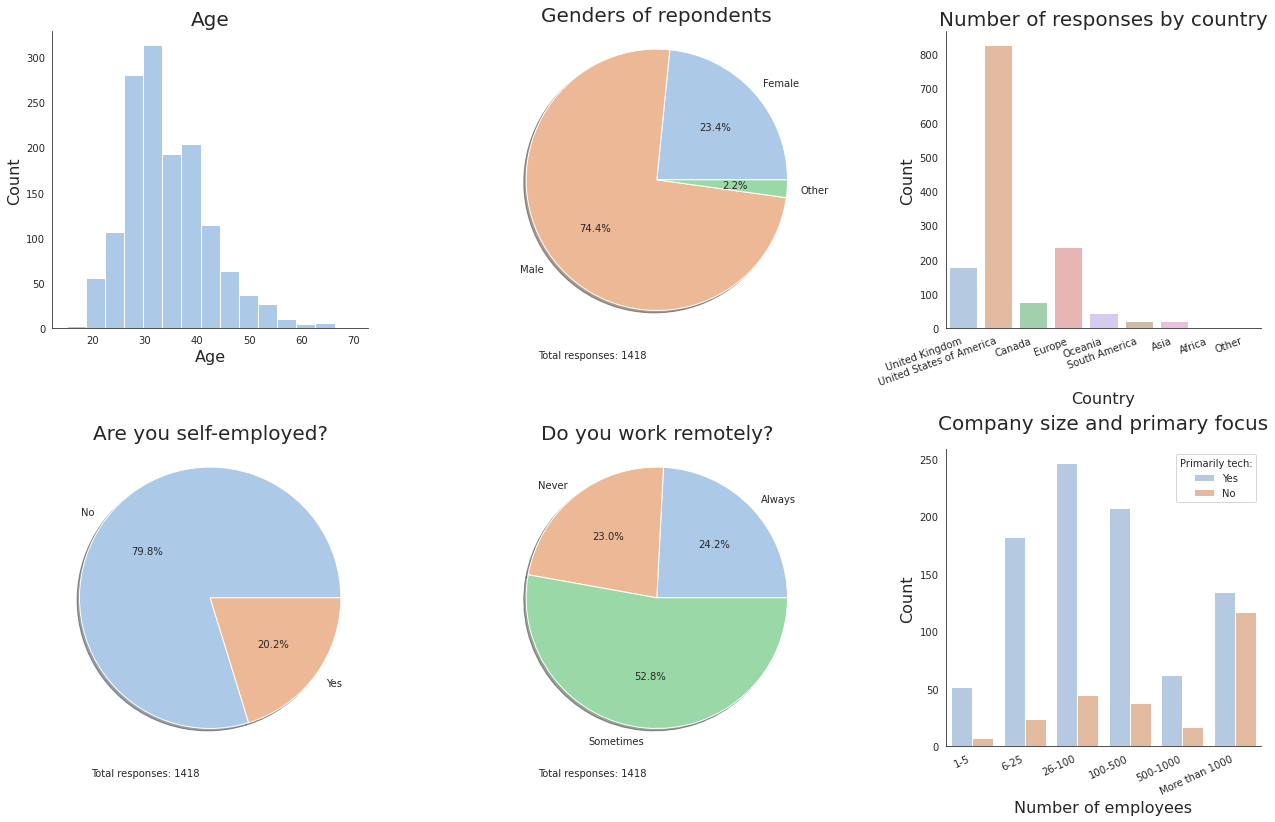

In [53]:
sns.set_style('white') # Seaborn for style
sns.set_palette('pastel', desat=0.7)

fig,ax = plt.subplots(2,3, figsize=(20,13))
fig.tight_layout(pad=10)

ax[0,0].hist(mhdf['What is your age?'], bins=15)
ax[0,0].set_title('Age', fontsize=20)
ax[0,0].set_xlabel('Age', fontsize=16)
ax[0,0].set_ylabel('Count', fontsize=16)

ax[0,1].pie(counted['What is your gender?'].dropna(how='all'), labels=['Female', 'Male', 'Other'], shadow=True, autopct='%1.1f%%', radius=1.1)
ax[0,1].set_title('Genders of repondents', fontsize=20, pad=10)
ax[0,1].text(-1, -1.5, 'Total responses: ' + str(int(counted['What is your gender?'].sum())))

sns.countplot(x=mhdf['What country do you live in?'], ax = ax[0,2]) 
ax[0,2].set_xticklabels(ax[0,2].get_xticklabels(), rotation=20, ha='right')
ax[0,2].set_xlabel('Country', fontsize=16)
ax[0,2].set_ylabel('Count', fontsize=16)
ax[0,2].set_title('Number of responses by country', fontsize=20)

ax[1,0].pie(counted['Are you self-employed?'].dropna(how='all'), labels=['No', 'Yes'], shadow=True, autopct='%1.1f%%', radius=1.1)
ax[1,0].set_title('Are you self-employed?', fontsize=20, pad=10)
ax[1,0].text(-1, -1.5, 'Total responses: ' + str(int(counted['Are you self-employed?'].sum())))

ax[1,1].pie(counted['Do you work remotely?'].dropna(how='all'), labels=counted['Do you work remotely?'].dropna(how='all').index, shadow=True, autopct='%1.1f%%', radius=1.1)
ax[1,1].set_title('Do you work remotely?', fontsize=20, pad=10)
ax[1,1].text(-1, -1.5, 'Total responses: ' + str(int(counted['Do you work remotely?'].sum())))

sns.countplot(x=mhdf['How many employees does your company or organization have?'], hue=mhdf['Is your employer primarily a tech company/organization?'], 
              order=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'], ax=ax[1,2])
ax[1,2].set_title('Company size and primary focus', fontsize=20, pad=20)
ax[1,2].set_xticklabels(ax[1,2].get_xticklabels(), rotation=25, ha='right')
ax[1,2].legend(title='Primarily tech:')
ax[1,2].set_xlabel('Number of employees', fontsize=16)
ax[1,2].set_ylabel('Count', fontsize=16)

plt.show
sns.despine()

#### Prevalence of mental health issues

Visual representation of the significant prevalence of mental health within the tech community is a powerful way to communicate the importance of understanding what attitudes exist and what factors have an impact on them.

<function matplotlib.pyplot.show(*args, **kw)>

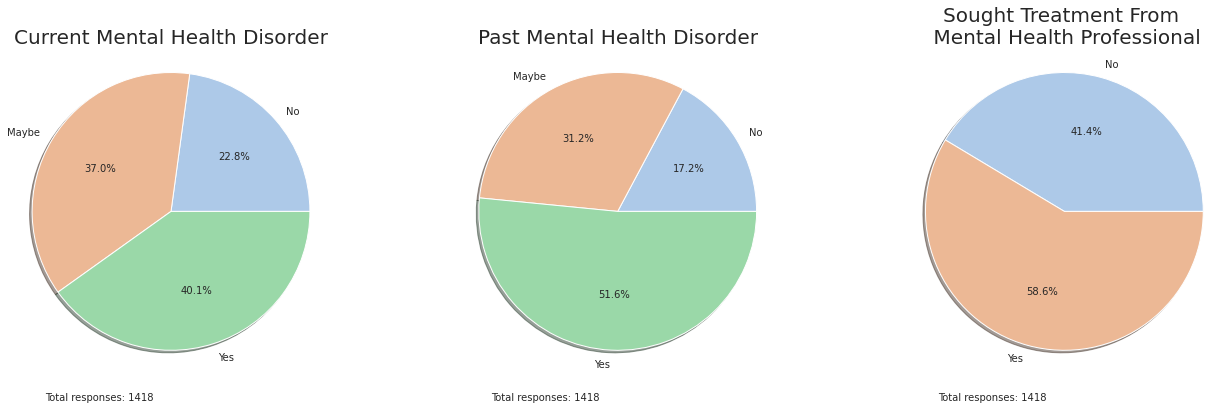

In [54]:
sns.set_style('white') # Seaborn for style
sns.set_palette('pastel', desat=0.7)

fig,ax = plt.subplots(1,3, figsize=(20,8))
fig.tight_layout(pad=10)

ax[0].pie(counted['Do you currently have a mental health disorder?'].dropna(how='all'), labels=['No', 'Maybe', 'Yes'], shadow=True, autopct='%1.1f%%', radius=1.1)
ax[0].set_title('Current Mental Health Disorder', fontsize=20, pad=10)
ax[0].text(-1, -1.5, 'Total responses: ' + str(int(counted['Do you currently have a mental health disorder?'].sum())))

ax[1].pie(counted['Have you had a mental health disorder in the past?'].dropna(how='all'), labels=['No', 'Maybe', 'Yes'], shadow=True, autopct='%1.1f%%', radius=1.1)
ax[1].set_title('Past Mental Health Disorder', fontsize=20, pad=10)
ax[1].text(-1, -1.5, 'Total responses: ' + str(int(counted['Have you had a mental health disorder in the past?'].sum())))

ax[2].pie(counted['Have you ever sought treatment for a mental health issue from a mental health professional?'].dropna(how='all'), labels=['No', 'Yes'], shadow=True, autopct='%1.1f%%', radius=1.1)
ax[2].set_title('Sought Treatment From \n Mental Health Professional', fontsize=20, pad=10)
ax[2].text(-1, -1.5, 'Total responses: ' + str(int(counted['Have you ever sought treatment for a mental health issue from a mental health professional?'].sum())))

plt.show

#### Existing attitudes toward mental health

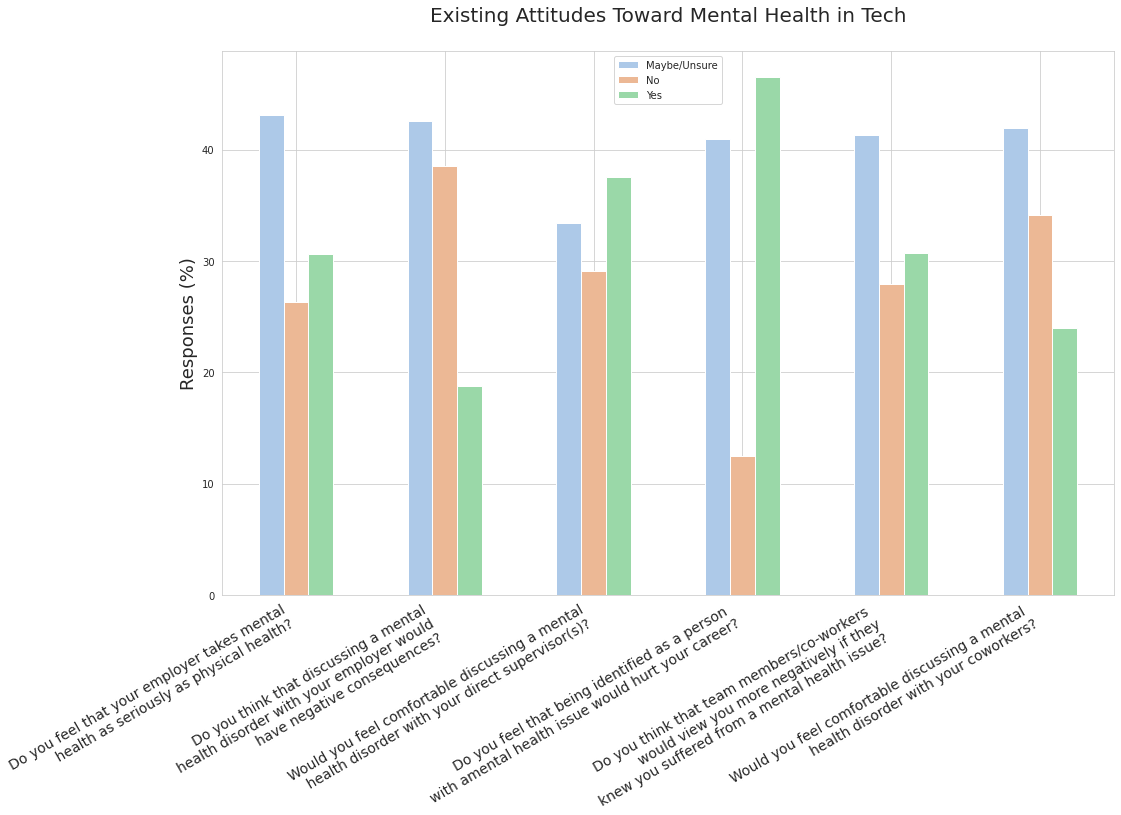

In [55]:
labels = ['Do you feel that your employer takes mental\n health as seriously as physical health?',
          'Do you think that discussing a mental\nhealth disorder with your employer would\nhave negative consequences?',
          'Would you feel comfortable discussing a mental\n health disorder with your direct supervisor(s)?',
          'Do you feel that being identified as a person \nwith amental health issue would hurt your career?',
          'Do you think that team members/co-workers \nwould view you more negatively if they\nknew you suffered from a mental health issue?',
          'Would you feel comfortable discussing a mental \nhealth disorder with your coworkers?'
]

sns.set_style('whitegrid')
sns.set_palette('pastel', desat=0.7)
fig, ax = plt.subplots(figsize=(16, 10))
topercent(attitudes).transpose().plot(kind='bar', stacked=False, ax=ax)
ax.set_ylabel('Responses (%)', fontsize=18)
ax.set_xticklabels(labels, rotation=30, ha='right', fontsize=14)
ax.set_title('Existing Attitudes Toward Mental Health in Tech', fontsize=20, pad=30)
ax.legend(loc='upper center')
plt.show()

In [56]:
topercent(agecareerct)

agebinned,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Do you feel that being identified as a person with a mental health issue would hurt your career?,,,,,,
Maybe/Unsure,33.3,42.3,41.4,39.9,28.9,40.0
No,33.3,14.2,12.8,6.7,4.4,30.0
Yes,33.3,43.5,45.8,53.4,66.7,30.0


#### Factors associated with attitudes toward mental health

**Demographics**

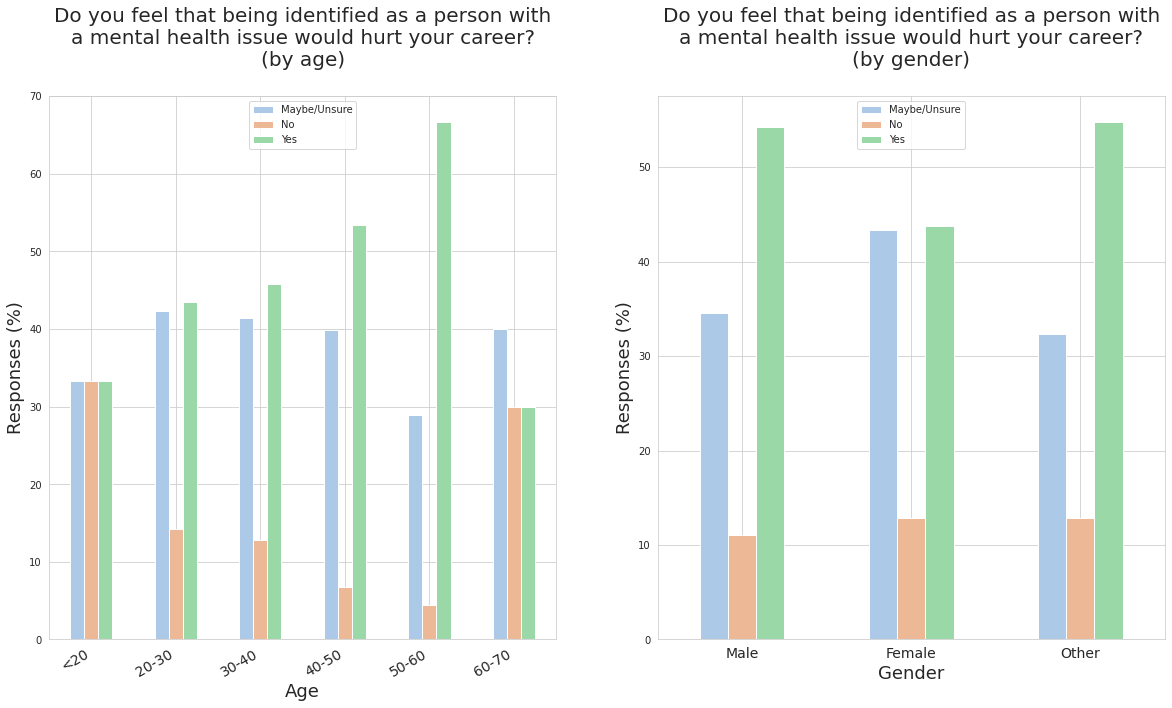

In [57]:
agelabels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70']
genderlabels= ['Male', 'Female', 'Other']

sns.set_style('whitegrid')
sns.set_palette('pastel', desat=0.7)

fig, ax = plt.subplots(1,2, figsize=(20, 10))

topercent(agecareerct).transpose().plot(kind='bar', ax=ax[0])
ax[0].set_ylabel('Responses (%)', fontsize=18)
ax[0].set_xlabel('Age',fontsize=18)
ax[0].set_xticklabels(agelabels, rotation=30, ha='right', fontsize=14)
ax[0].set_title('Do you feel that being identified as a person with\na mental health issue would hurt your career?\n(by age)', fontsize=20, pad=30)
ax[0].legend(loc='upper center')

topercent(gendercareer).transpose().plot(kind='bar', ax=ax[1])
ax[1].set_ylabel('Responses (%)', fontsize=18)
ax[1].set_xlabel('Gender',fontsize=18)
ax[1].set_xticklabels(genderlabels, rotation=0, ha='center', fontsize=14)
ax[1].set_title('Do you feel that being identified as a person with\na mental health issue would hurt your career?\n(by gender)', fontsize=20, pad=30)
ax[1].legend(loc='upper center')

plt.show()

**Employer action and healthcare coverage**

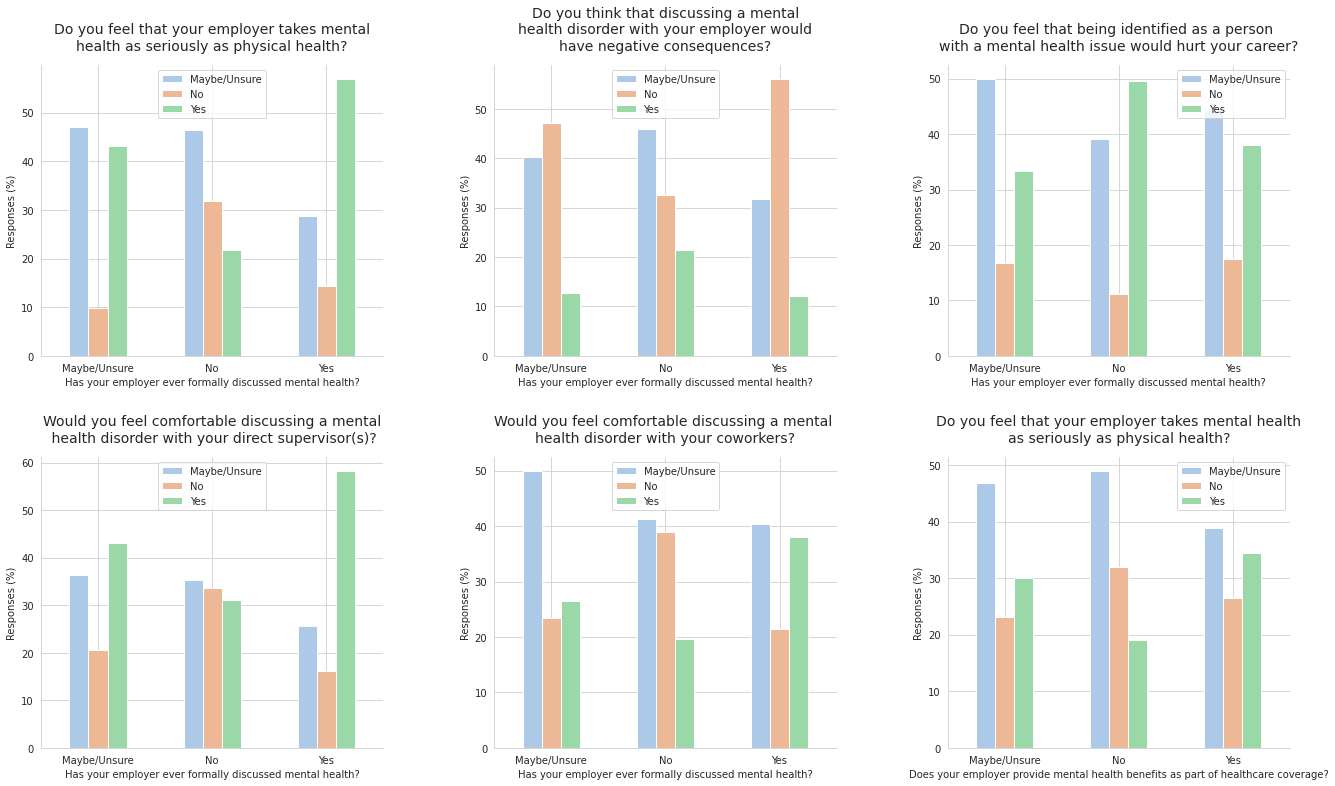

In [58]:
sns.set_style('whitegrid')
sns.set_palette('pastel', desat=0.7)

fig, ax = plt.subplots(2,3,figsize=(20, 12))

fig.tight_layout(pad=8)

topercent(actionserious).transpose().plot(kind='bar', stacked=False, ax=ax[0,0], rot=0)
ax[0,0].set_ylabel('Responses (%)')
ax[0,0].set_xlabel('Has your employer ever formally discussed mental health?')
ax[0,0].set_title('Do you feel that your employer takes mental\nhealth as seriously as physical health?', fontsize=14, pad=15)
ax[0,0].legend(loc='upper center')

topercent(actiondiscuss).transpose().plot(kind='bar', stacked=False, ax=ax[0,1], rot=0)
ax[0,1].set_ylabel('Responses (%)')
ax[0,1].set_xlabel('Has your employer ever formally discussed mental health?')
ax[0,1].set_title('Do you think that discussing a mental\nhealth disorder with your employer would\nhave negative consequences?', fontsize=14, pad=15)
ax[0,1].legend(loc='upper center')

topercent(actioncareer).transpose().plot(kind='bar', stacked=False, ax=ax[0,2], rot=0)
ax[0,2].set_ylabel('Responses (%)')
ax[0,2].set_xlabel('Has your employer ever formally discussed mental health?')
ax[0,2].set_title('Do you feel that being identified as a person \nwith a mental health issue would hurt your career?', fontsize=14, pad=15)
ax[0,2].legend(loc='upper right')

topercent(actionsupdiscuss).transpose().plot(kind='bar', stacked=False, ax=ax[1,0], rot=0)
ax[1,0].set_ylabel('Responses (%)')
ax[1,0].set_xlabel('Has your employer ever formally discussed mental health?')
ax[1,0].set_title('Would you feel comfortable discussing a mental\n health disorder with your direct supervisor(s)?', fontsize=14, pad=15)
ax[1,0].legend(loc='upper center')

topercent(actioncodiscuss).transpose().plot(kind='bar', stacked=False, ax=ax[1,1], rot=0)
ax[1,1].set_ylabel('Responses (%)')
ax[1,1].set_xlabel('Has your employer ever formally discussed mental health?')
ax[1,1].set_title('Would you feel comfortable discussing a mental \nhealth disorder with your coworkers?', fontsize=14, pad=15)
ax[1,1].legend(loc='upper center')

topercent(coverserious).transpose().drop('Not eligible for coverage / N/A').plot(kind='bar', stacked=False, ax=ax[1,2], rot=0)
ax[1,2].set_ylabel('Responses (%)')
ax[1,2].set_xlabel('Does your employer provide mental health benefits as part of healthcare coverage?')
ax[1,2].set_title('Do you feel that your employer takes mental health\nas seriously as physical health?', fontsize=14, pad=15)
ax[1,2].legend(loc='upper right')


sns.despine()
plt.show()


### 1.5 Insight

Attitudes surrounding mental health are complex involving multiple domains including but not limited to demographics, employer actions, systemic attitudes and individual backgrounds. 

**Demographics of survey respondents**
- The bulk of participants in this survey came from the United States (>50%), with the remainder coming from predominantly white, English speaking countries (Canada, Australia, UK and other European countries). This may significantly limit the generalisability of these results to a global setting.
- Respondents were generally young, with a mean age of only 34.
- Respondents were largely male (74%).

**Prevalence of mental health**<br>
Mental health disorders were highly prevalent within the respondents of this survey. More than half (58%) of respondents have sought treatment for a mental health issue from a mental health professional with 40% reporting that they currently have a mental health disorder. This highlights the importance of understanding the prevailing attitudes surrounding mental health and the impact of factors that may be associated with them. Unfortunately, the survey did not collect data on the prevalence of physical health issues for comparison.

**Key attitudes regarding mental health in tech**<br>
Prior to continuing with the insights gained, it is worth noting that there was a significant degree of uncertainty amongst survey respondents regarding many domains with most questions receiving a response of Maybe or Unsure 30-40% of the time.

From the questions asked in the survey, several questions were identified as being highly representative of the prevailing attitudes surrounding mental health:

- Do you feel that your employer takes mental health as seriously as physical health?
- Do you think that discussing a mental health disorder with your employer would have negative consequences?
- Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
- Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
- Would you feel comfortable discussing a mental health disorder with your coworkers?
- Do you feel that being identified as a person with a mental health issue would hurt your career?


Only 30% of people felt that their employer took mental health as seriously as physical health. This is extremely concerning given the significant prevalence of mental health issues amongst respondents. There exists considerable concern that being open about mental health will result in negative impact from both employers and co-workers. Only 38% of respondents feel that discussing a mental health disorder with their employer would not have a negative impact, with the remainder certain it would (19%) or being unsure (43%). This concern also extends to co-workers, with 31% feeling they would be viewed more negatively after discussing a mental health issue and 41% being unsure. Given these concerns, only a minority of respondents were comfortable talking about mental health with both supervisors(37.5%) and co-workers (24%). It is possible that the lack of comfort discussing mental health has led to much of the uncertainty expressed in the responses to these surveys. Finally, these cumulative attitudes have led to 47% of respondents feeling as though being identified as having a mental health issue would harm their career.

**Factors associated with these attitudes**<br>
*Demographics*<br>
The proportion of respondents who felt that being identified as having a mental health issue would hurt their career was greater in older age groups – 44% in ages 20-30 vs 67% in ages 50-60. This may have been skewed by the lower number of respondents in the older age groups, so needs to be interpreted cautiously. 

Gender did not have as significant an impact, but both those who identified as men or neither male/female expressed slightly more concern that mental health would harm their career. Once again, the survey was heavily skewed toward men, which tempers the interpretation of this result.

It is difficult to interpret the impact of country of respondents on attitudes as the survey was heavily skewed toward the USA resulting in comparatively small numbers in other countries.

*Employer action*<br>
Given the prevalence of mental health amongst tech workers, directed employer action to address it makes sense. An employer formally discussing mental health has a significant positive impact on attitudes of employees. Formally discussing mental health resulted in a greater proportion of respondents feeling that mental health was taken seriously, less perception of mental health leading to negative consequences and a greater openness to discussing mental health with colleagues and supervisors. It also resulted in less respondents feeling that being identified as having a mental health issue would harm their career. However, this benefit was not as marked as in other domains, likely indicating that there are greater systemic issues driving this attitude outside of a persons current workplace.

*Healthcare for mental health*<br>
Including mental health benefits significant increased the proportion of respondents who felt that mental health was taken as seriously as physical health (35% vs 19%).

In addition to improving attitudes surrounding mental health, providing coverage for it has other potential benefits for employers given its prevalence. Being effectively treated for a mental health issue significantly reduced the proportion of time that it interfered with work. 

**Limitations of analysis**<br>
Differences related to specific factors were only compared qualitatively, there are a variety of stastical tests that could be applied to determine the significant of these differences. Correlation between each question and each other was not assessed.

**Conclusion**<br>
The prevailing attitudes surrounding mental health in tech were negative or uncertain. A significant proportion of respondents felt that being identified as having a mental health issue would harm their career and have negative consequences with their employer and co-workers. Mental health issues were extremely prevalent and deserving of attention. Direct employer action by way of formally discussing mental health had a positive impact on attitudes as did ensuring healthcare for mental health was provided.






---
## QUESTION 2

#### Question: 
What can the headlines from the Australian national broadcaster (the ABC) tell us about the concerns of the Australian public over time?

#### Data:
[A Million News Headlines](https://www.kaggle.com/therohk/million-headlines)

#### Minimum required techniques:
Word frequency


In [59]:
# import libraries for this question here
# Earlier libraries remain imported from question one (numpy, pandas, re, matplotlib and seaborn)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### 2.1 Question

Does the mention of specific words and topics change over time? How do  these relate to national and international events?<br>

The ABC is a publicly funded national broadcaster, which should (subject to some debate) represent current events and national concerns. <br>
Analysing the mention of specific topics over time should enable commentary on the concerns fo the Australian public over time.<br>
The essential components of this question are choosing areas of concern and then examining their trends over time.<br>
<br>
Key stakeholders in the outcomes of this analysis could include the ABC itself, other news reporting agencies seeking to compare trends as well as historians/anthropologists/commentators.

### 2.2 Data

In [60]:
# Import the data
headlines = pd.read_csv('data/abcnews-date-text.csv')

In [61]:
headlines.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [62]:
# Clean/prepare the data for analysis

# Split the date into separate year and month columns, drop the old date column
headlines['publish_date'] = headlines['publish_date'].astype(str)
headlines['year'] = headlines['publish_date'].str[:4]
headlines['month'] = headlines['publish_date'].str[4:6]
headlines.drop('publish_date', axis=1, inplace=True)
headlines = headlines[['year', 'month', 'headline_text']]
headlines.rename(columns = {'headline_text' : 'text'}, inplace=True)

In [63]:
headlines.head()

,year,month,text
0,2003,02,aba decides against community broadcasting lic...
1,2003,02,act fire witnesses must be aware of defamation
2,2003,02,a g calls for infrastructure protection summit
3,2003,02,air nz staff in aust strike for pay rise
4,2003,02,air nz strike to affect australian travellers


A yearly timescale is the simplest way to analyse our data for now. We need to group the headlines by year to facillitate this.

In [64]:
# To start with let's look at data by year

yearly = headlines.groupby(['year']).agg({'text': ' '.join})

Utilising the python library NLTK we can split the entire years worth of headlines into a list of words and then remove any stop words (the, and, or, etc...).

In [65]:
# Tokenize the headlines, and filter out the stop words

yearly_tokenized = pd.DataFrame(index=yearly.index, columns=yearly.columns)
yearly_tokenized['text'].astype('object')

stop_words = set(stopwords.words('english'))

headlines_filtered = []

for text in yearly['text']:
    word_tokens = word_tokenize(text)
    filtered = []
    for word in word_tokens:
        if word not in stop_words:
            filtered.append(word)
    headlines_filtered.append(filtered)
yearly_tokenized['text'] = headlines_filtered
yearly_tokenized

,text
year,
2003,"[aba, decides, community, broadcasting, licenc..."
2004,"[9, dead, bomb, ends, aceh, new, years, concer..."
2005,"[10, killed, kashmir, new, year, party, called..."
2006,"[adelaide, end, losing, streak, adelaide, notc..."
2007,"[140, arrested, adelaide, new, years, 1976, go..."
2008,"[2007, deadliest, year, yet, us, troops, iraq,..."
2009,"[2008, deadliest, year, us, forces, afghanista..."
2010,"[12m, degas, stolen, museum, 17, die, banglade..."
2011,"[11, killed, nigerian, market, blast, 15, drow..."


Iterating through an entire years worth of words to count occurences is likely to be computationally expensive, to facillitate searching a single string for words we can join the list back together into a single string now that we have filtered out the stop words.

In [66]:
yearly_filtered = yearly_tokenized.copy()

for year in yearly_filtered.index:
    yearly_filtered.loc[year] = yearly_filtered.loc[year].str.join(' ')
    

In [67]:
yearly_filtered

,text
year,
2003,aba decides community broadcasting licence act...
2004,9 dead bomb ends aceh new years concert abando...
2005,10 killed kashmir new year party called afters...
2006,adelaide end losing streak adelaide notch 4 2 ...
2007,140 arrested adelaide new years 1976 govt pape...
2008,2007 deadliest year yet us troops iraq 372 fre...
2009,2008 deadliest year us forces afghanistan 2008...
2010,12m degas stolen museum 17 die bangladesh bus ...
2011,11 killed nigerian market blast 15 drown egypt...


### 2.3 Analysis

<br>
In order to derive insights about the concerns of the Australian public over time we can examine specific topics. The topics chosen were determined based on categories of news reporting taken from the ABC news website (https://www.abc.net.au/news) and the Wikipedia article on news (https://en.wikipedia.org/wiki/News).

#### Chosen topics to analyse:
- Crime and Justice
- International and World News
- Disasters
- War and terrorism
- Education, science and the arts
- Economy and business
- Health
- Politics
- Sport
- Specific topics of interest
    - The topics and words within this category were picked based on knowledge of Australian culture and specific issues that may not have been covered by the other topics.
- Good News

#### Choosing words representative of each topic:
Determining the words relevant to each topic was done by reviewing news headlines that belonged to the categories above on both the ABC news website and within the dataset being examined. A list of words for each topic was generated using this approach.

In [68]:
# Define a function to search for a list of words in the dataframe of tokenized headlines by year and then output to a new dataframe

def countwordtokens(sourcedf, wordlist):
    output = pd.DataFrame(index=sourcedf.index, columns=wordlist)
    for year, text in sourcedf.iteritems():
        for word in wordlist:
            count = 0
            for token in text:
                if re.findall(word, token):
                    count +=1
            output.loc[year,word] = count
    return output

# Define a function to search for a list of words in the dataframe of untokenized headlines by year and then output to a new dataframe

def countwords(sourcedf, wordlist):
    output = pd.DataFrame(index=sourcedf.index, columns=wordlist)
    for year, text in sourcedf.iteritems():
        for word in wordlist:
            count = len(re.findall(word, text))
            output.loc[year,word] = count
    return output

#### Crime and justice

In [69]:
cjlist = ['police', 'crime', 'jail', 'court', 'charged', 'sentenced', 'murder', 'robbery', 'assault', 'trial', 'jury', 'arrested']

%timeit -n 1 -r 1 cj = countwords(yearly_filtered['text'], cjlist)

%timeit -n 1 -r 1 cj_tokens = countwordtokens(yearly_tokenized['text'], cjlist)

783 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [70]:
cj = countwords(yearly_filtered['text'], cjlist)

With the functions defined above we are able to count the total occurences of a list of words in either a tokenized list or an entire string. Iterating through each token for an entire year of words is extremely computationally ineffecient as demonstrated in the previous cell. From here onwards we will utilise the 'countwords' function to search the entire string of words utilising the regex operation findall.

#### International and World News

In [71]:
countrylist = ['australia', 'new zealand', 'nz', 'china', 'taiwan', 'india', 'pakistan', 'iraq', 'iran', 'afghanistan', 'afghan', 'indonesia', 'thailand', 'thai', 'vietnam',
             'usa', 'united states', 'uk', 'united kingdom', 'germany', 'france', 'spain', 'south africa', 'treaty', 'trade', 'diplomatic', 'ambassador',
              'international']
countries = countwords(yearly_filtered['text'], countrylist)

In [72]:
# Condense abbreviations and contractions of countries into single entries

countries['new zealand'] = countries['new zealand'] + countries['nz']
countries.drop('nz', axis=1, inplace=True)

countries['afghanistan'] = countries['afghanistan'] + countries['afghan']
countries.drop('afghan', axis=1, inplace=True)

countries['thailand'] = countries['thailand'] + countries['thai']
countries.drop('thai', axis=1, inplace=True)

countries['uk'] = countries['uk'] + countries['united kingdom']
countries.drop('united kingdom', axis=1, inplace=True)

countries['usa'] = countries['usa'] + countries['united states']
countries.drop('united states', axis=1, inplace=True)

#### Disasters

In [73]:
disasterlist = ['cyclone', 'floods', 'flooding', 'bushfire', 'bushfires', 'earthquake', 
                'tsunami', 'tornado', 'hurricane', 'typhoon', 'volcano', 'disaster', 'pandemic']
disasters = countwords(yearly_filtered['text'], disasterlist)

In [74]:
# Condense the disaster dataframe
disasters['bushfire'] = disasters['bushfire'] + disasters['bushfires']
disasters.drop('bushfires', axis=1, inplace=True)
disasters['floods'] = disasters['floods'] + disasters['flooding']
disasters.drop('flooding', axis=1, inplace=True)

#### War and terrorism

In [75]:
wtlist = ['war', 'troops', 'army', 'navy', 'air force', 'battle', 'terror', 'bombing', 'attack', 'attacks']
wt = countwords(yearly_filtered['text'], wtlist)

#### Education, science and the arts

In [76]:
esalist = ['school', 'university', 'study', 'discovery', 'planet', 'research', 'student', 'art']
esa = countwords(yearly_filtered['text'], esalist)

#### Economy and business

In [77]:
ehilist = ['economy', 'investor', 'credit', 'business', 'stock', 'exchange', 'money', 'market', 'rent', 'savings', 'tax', 'ato', 'asx', 'bank', 'finance', 'profits']
ehi = countwords(yearly_filtered['text'], ehilist)

#### Health

In [78]:
healthlist = ['vaccine', 'medicine', 'doctor', 'doctors', 'nurse', 'nurses', 'hospital', 'hospitals', 'disease', 'cure', 'treatment', 'aged care']
health = countwords(yearly_filtered['text'], healthlist)

#### Politics

In [79]:
politiclist = ['government', 'council', 'election', 'labour', 'alp', 'liberal', 'cabinet', 'minister', 'lnp', 'rudd', 'morrison', 'abbott', 'turnbull', 'gillard', 'albanese']
politic = countwords(yearly_filtered['text'], politiclist)

In [80]:
# Condense the politics dataframe
politic['labour'] = politic['labour'] + politic['alp']
politic.drop('alp', axis=1, inplace=True)
politic['liberal'] = politic['liberal'] + politic['lnp']
politic.drop('lnp', axis=1, inplace=True)

#### Sport

In [81]:
sportlist = ['cricket', 'football', 'soccer', 'basketball', 'player', 'golf', 'olympics', 'match']
sport = countwords(yearly_filtered['text'], sportlist)

#### Specific topics of interest

In [82]:
specificlist = ['climate', 'renewable', 'immigration', 'asylum', 'border', 'indigenous', 'aboriginal', 'mining']
specific = countwords(yearly_filtered['text'], specificlist)

In [83]:
# Condense the specific topics dataframe
specific['indigenous'] = specific['indigenous'] + specific['aboriginal']
specific.drop('aboriginal', axis=1, inplace=True)

#### Good news

In [84]:
goodlist = ['celebrate', 'happy', 'amazed', 'winner', 'saved', 'puppy', 'kitten', 'joy', 'dance', 'peace', 'hope']
good = countwords(yearly_filtered['text'], goodlist)

#### All topics together

In [85]:
# List of all dataframes
topiclist = [cj, countries, disasters, wt, esa, ehi, health, politic, sport, specific, good]
# Define dataframe for sum of topic data
headings = ['Crime and Justice', 'International and World News', 'Disasters', 'War and Terrorism', 'Education, Science, Art', 
            'Economy and Business', 'Health', 'Politics', 'Sport', 'Specific Topics', 'Good News']

In [86]:
# Combine all of the dataframes into one
everything = pd.concat(topiclist, axis=1)

In [87]:
# Sum each of the topics and group them under a newly named column
count = 0
for i in topiclist:
    everything[headings[count]] = everything[i.columns].sum(axis=1)
    everything.drop(i.columns, axis=1, inplace=True)
    count += 1

In [88]:
everything # Everything together

,Crime and Justice,International and World News,Disasters,War and Terrorism,"Education, Science, Art",Economy and Business,Health,Politics,Sport,Specific Topics,Good News
year,,,,,,,,,,,
2003,6583.0,6969.0,689.0,5230.0,3062.0,2533.0,1855.0,3107.0,806.0,943.0,1319.0
2004,7453.0,7800.0,849.0,5567.0,3577.0,2963.0,2359.0,4085.0,917.0,1016.0,1407.0
2005,7672.0,6487.0,1534.0,5577.0,3656.0,3354.0,2499.0,4203.0,793.0,1188.0,1361.0
2006,6826.0,5868.0,1068.0,4804.0,3406.0,2815.0,1997.0,3933.0,690.0,1240.0,1220.0
2007,9122.0,6012.0,1052.0,5326.0,3717.0,3278.0,2564.0,5498.0,680.0,1740.0,1251.0
2008,9552.0,6781.0,828.0,4426.0,4138.0,4095.0,2012.0,4624.0,877.0,1426.0,1286.0
2009,8481.0,5148.0,1542.0,4377.0,3729.0,3563.0,1955.0,3763.0,698.0,1465.0,1067.0
2010,8321.0,4518.0,1033.0,4221.0,3743.0,3301.0,1854.0,4558.0,689.0,1657.0,1078.0
2011,7538.0,4720.0,1718.0,3926.0,3576.0,3816.0,1717.0,3624.0,643.0,1502.0,1172.0


### 2.4 Visualisation

#### Frequency of topics over time

The simplest way to visualise the data we have obtained is by plotting the frequency of the broad topics over time using a lineplot.

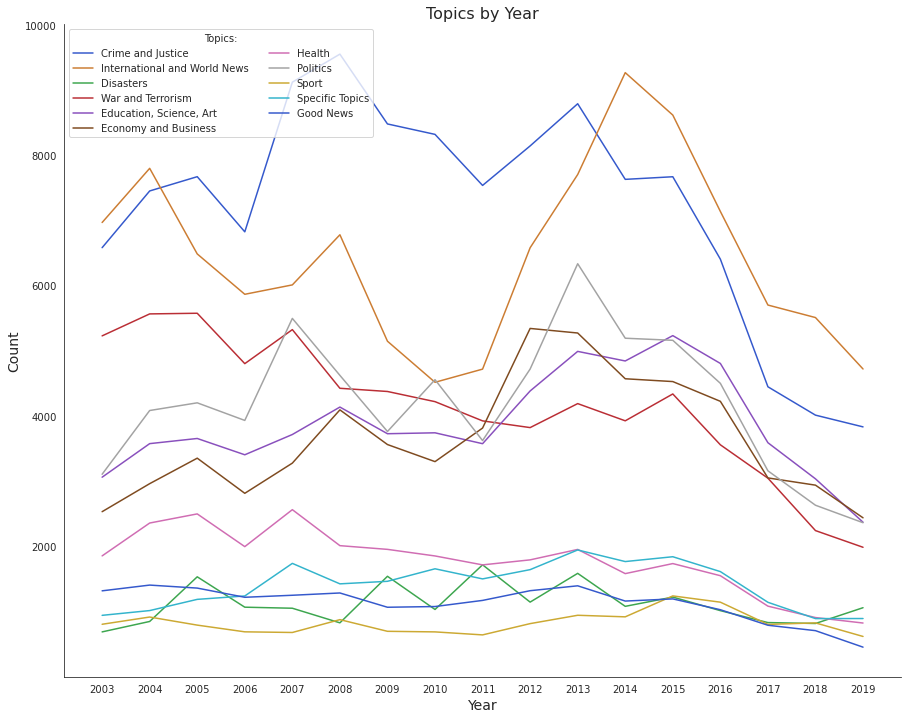

In [89]:
sns.set_style('white') # Seaborn for style
sns.set_palette('bright', desat=0.6)

fig, ax = plt.subplots(figsize=(15,12))
ax.plot(everything)
ax.set_title('Topics by Year', fontsize=16)
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.legend(everything.columns.tolist(), title='Topics:', ncol=2)
sns.despine()
plt.show()

#### Total headlines over time
When looking at the plot of everything together, there looks to be a trend of less total headlines over time.<br>
If this is the case, it could have an impact on the interpretation

In [90]:
headperyearlist = []
for year in yearly_filtered.index:
    headperyearlist.append(len(headlines[(headlines['year'] == year)]))
headperyear = pd.DataFrame(headperyearlist, columns=['total_headlines'])
headperyear.index = yearly_filtered.index

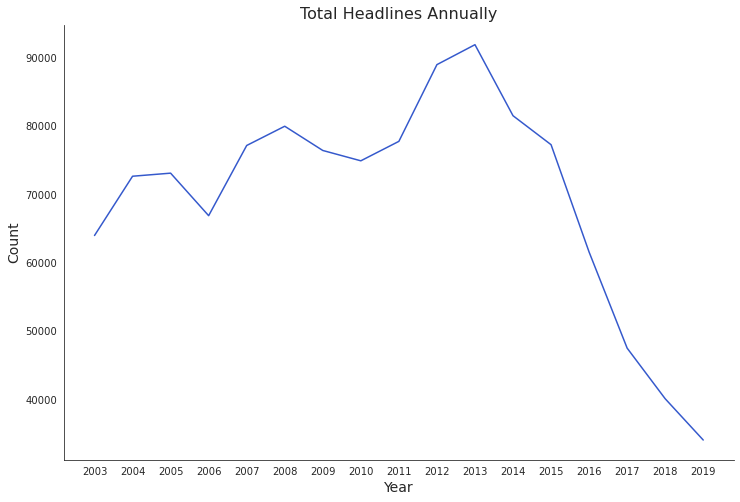

In [91]:
sns.set_style('white') # Seaborn for style
sns.set_palette('bright', desat=0.6)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(headperyear)
ax.set_title('Total Headlines Annually', fontsize=16)
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
sns.despine()
plt.show()

This confirms our concern that the total number of headlines fluctuates significantly by year and ultimately has declined substantially in the past 5 years.

#### Index combined topics by year
The topics can be indexed against the total publication in each year to try and offset the significant decline in number of headlines in recent year.

In [92]:
everythingindex = everything.copy()

for i in everythingindex.columns:
    everythingindex[i] = everythingindex[i].div(headperyear['total_headlines'])

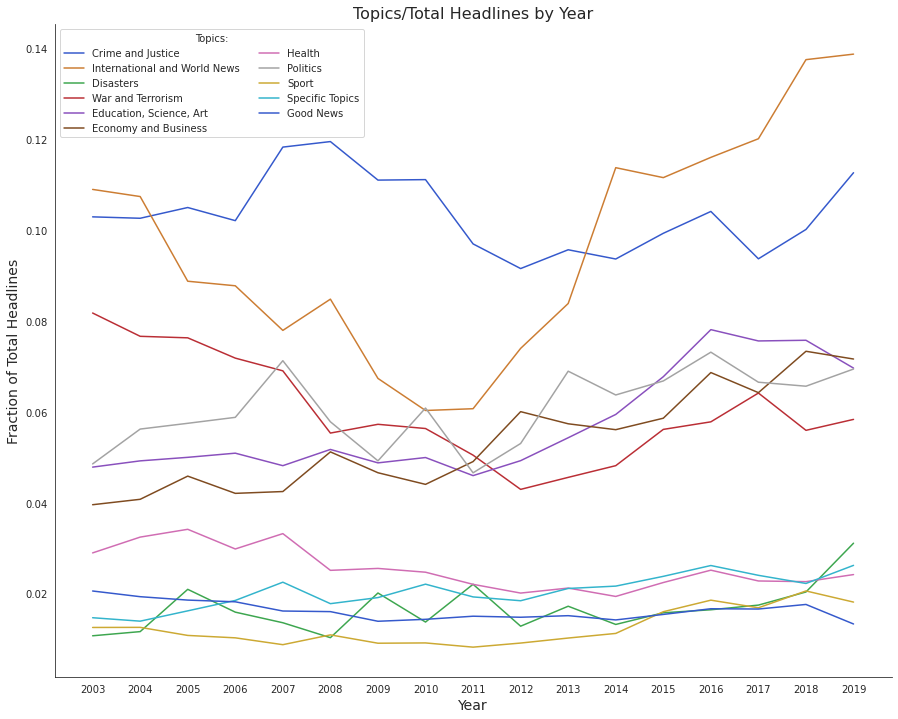

In [93]:
sns.set_style('white') # Seaborn for style
sns.set_palette('bright', desat=0.6)

fig, ax = plt.subplots(figsize=(15,12))
ax.plot(everythingindex)
ax.set_title('Topics/Total Headlines by Year', fontsize=16)
ax.set_ylabel('Fraction of Total Headlines', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.legend(everythingindex.columns.tolist(), title='Topics:', ncol=2)
sns.despine()
plt.show()

#### Topics of interest

International and world news saw a considerable increase over time, we can plot it separately to see what has driven this rise.<br>
The specific topics section is also worth looking at separately given it covers a broad range of separate issues.
<br><br>
These plots will also need to be indexed over time.

##### Countries, international relations

In [94]:
# Index the two areas we want to plot in more detail

countriesindex = countries.copy()

for i in countriesindex.columns:
    countriesindex[i] = countriesindex[i].div(headperyear['total_headlines'])
    
specificindex = specific.copy()

for i in specificindex.columns:
    specificindex[i] = specificindex[i].div(headperyear['total_headlines'])

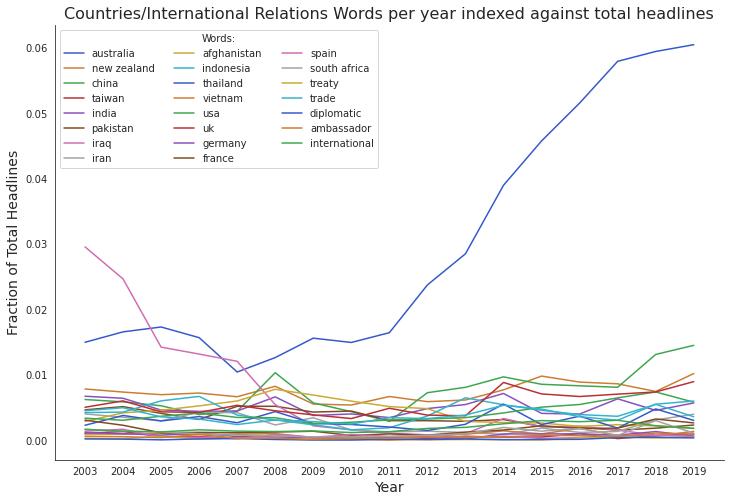

In [95]:
# Plot the Countries/International Relations Topic

sns.set_style('white') # Seaborn for style
sns.set_palette('bright', desat=0.6)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(countriesindex)
ax.set_title('Countries/International Relations Words per year indexed against total headlines', fontsize=16)
ax.set_ylabel('Fraction of Total Headlines', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.legend(countriesindex.columns.tolist(), title='Words:', loc='upper left', ncol=3, fancybox=True)
sns.despine()
plt.show()

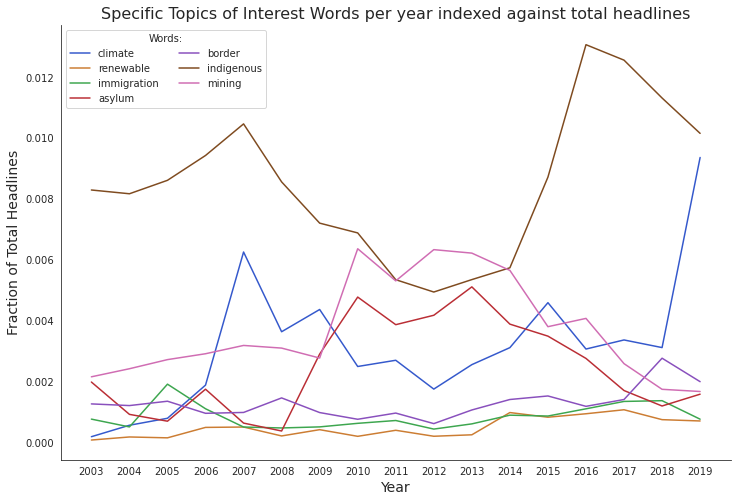

In [96]:
# Plot the Specific Topics

sns.set_style('white') # Seaborn for style
sns.set_palette('bright', desat=0.6)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(specificindex)
ax.set_title('Specific Topics of Interest Words per year indexed against total headlines', fontsize=16)
ax.set_ylabel('Fraction of Total Headlines', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.legend(specificindex.columns.tolist(), title='Words:', loc='upper left', ncol=2, fancybox=True)
sns.despine()
plt.show()

### 2.5 Insight

**General Insights**
- There has been a significant decline in the total number of headlines published since 2013. The peak was just over 90,000 headlines in 2013, falling steeply since with just under half this number of headlines in 2019
- This could coincide with progressive funding cuts since 2014 (https://www.theguardian.com/media/2020/may/04/abc-loses-793m-funding-since-2014-when-coalition-made-its-first-cuts-report)
- This substantial decline necessitated representing topics as an index of total headlines per year to enable meaningful analysis of changes over time

**Topics that declined over time**
- *War and terrorism:* 
    - Steady decline in mention of words relating to war and terrorism has occurred since 2003, although there has been a slight upward trend in recent years.

**Topics that were unchanged over time**
- *Crime and justice:* 
    - Consistently high level of reporting, which has been maintained over the time period examined.
- *Politics:*
    - Consistently high level of reporting, which has been maintained over the time period examined.
- *Good news:*
    - Unfortuantely good news formed the minority of mentions in headlines, which was consistent over time.

**Topics that increased over time**
- *Countries and international relations*:
    - Use of the word 'Australia' was the primary driver in the overall increase in headlines observed in this topic. This could represent increased reporting on domestic matters or could even be interpreted as increasing Australian nationalism
    - Interestingly, when plotted seperately, mention of Iraq was high in 2003 declining thereafter. This coincided with the 2003 invasion of Iraq.
- *Disasters*:
    - Although forming an overall small proportion of headlines, mention of disasters has more than doubled since 2003.
    - Fluctuance can be observed over time with peaks tracking world events in 2005 (follow on from the boxing day tsunami, and subsequently hurricane Katrina in the USA), 2011 (Queensland Floods), 2019 (onset of the Australian bushfires).
- *Education, science and art*:
    - Steady rise since 2011, it is difficult to relate this to specific concerns. However, possibilities include significant changes to university fees and funding over this time period or perhaps an increase in the rate of scientific discovery.
- *Economy and Business*:
    - Steady, but consistent increase over time. This could reflect increasing economic volatility over time, concern for rising housing and rental prices or increased coverage of businesses.
- *Sport:*
    - Slight increase over time.
- *Specific topics:*
    - Combined slight increase over time, but the fluctuation of the individual word mentions within are more interesting.
    - Concern regarding the climate significantly increased, reaching it's highest number of mentions in 2019
    - Concern regarding asylum seekers peaked between 2010 and 2013 and has declined since
    - Mining followed a similar pattern to asylum seekers
    - Indigenous australians have remains a consistent topic of concern, with two peaks (2007 and 2016)

**Limitations of analysis**
- Topics of interest and the words to represent them were picked prior to analysis of the dataset, rather than based on initial analysis of the headlines
    - This could result in significant topics being missed, the topics being chosen not representative of public concern or the words chosen not being truly representetive of the topics themselves
- Indexing of words / topics against total headlines published in a year assumes that each word found correlates to a single headline. This is unlikely to be the case as with the word frequency technique used there is likely to be overlap within and even between topics.

**Future directions**
- Frequency of headlines relating to a specific topic does not convey sentiment toward the particular topic, examining sentiment regarding particular topics over time could provide useful insight
- Generating topics from the data itself prior to examining their trends over time would potentially provide a more accurate representation of 


**Conclusion**<br>
Headlines from the ABC were able to track changes in multiple topics representing the changing concerns of the Australian public over time.